In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

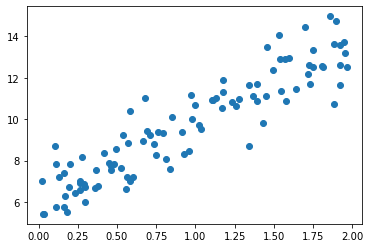

In [4]:
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)
plt.scatter(X, y);plt.show()

In [6]:
y.shape

(100, 1)

In [20]:
X.shape[0]

100

In [7]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

In [9]:
y_pred = np.dot(X, w1.T) + w0

In [12]:
diff = y - y_pred
w1_update = - (2/100)*0.01*(np.dot(X.T, diff))

In [13]:
w1_update

array([[-0.21359491]])

In [18]:
w0_factors = np.ones((100,1))
w0_update = - (2/100) * 0.01 * (np.dot(w0_factors.T, diff))
w0_update

array([[-0.19441663]])

In [24]:
X.shape[0]

100

In [43]:
def get_weight_updates(X, y, learning_rate = 0.01):
    m = X.shape[0] #m=100
    # w1, w0을 임의의 값으로 설정
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 첫 비용함수의 값을 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    rss = 1/m*np.sum((y - y_pred)**2)
    
    # 바로 직전의 rss값 저장
    prev_rss = rss

    for i in range(10000):
        # w1, w0을 업데이트
        w1_update = - (2/m) * learning_rate * (np.dot(X.T, diff))
        w0_factors = np.ones((m,1))
        w0_update = - (2/m) * learning_rate * (np.dot(w0_factors.T, diff))
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
        # 다시 비용함수의 값을 계산
        y_pred = np.dot(X, w1.T) + w0
        diff = y - y_pred
        
        # 새로 구한 rss 값
        rss = 1/m*np.sum((y - y_pred)**2)
        
        # 새로 구한 rss 값을 prev_rss와 비교
        if rss < prev_rss:
            # 감소했다면 prev_rss 업데이트하고 다음 loop 진행
            prev_rss = rss
        else:
            #감소하지 않았다면 반복 loop 종료하고 w1, w0 반환
            print(i, 'rss가 감소하지 않았습니다.')
            return w1, w0
            

In [45]:
w1, w0 = get_weight_updates(X, y)

4389 rss가 감소하지 않았습니다.


In [54]:
y_pred = w1 * X + w0
y_pred[:10]

array([[ 7.67036451],
       [ 9.31250597],
       [ 8.93061049],
       [ 9.6065128 ],
       [ 8.20076153],
       [10.53796834],
       [12.63261825],
       [ 6.99043443],
       [10.01326693],
       [ 7.10032802]])

In [55]:
round(np.mean((y - y_pred)**2), 3)

0.987

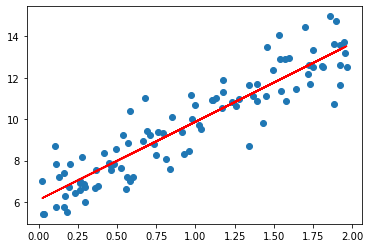

In [58]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()